# 4  NumPy Basics: Arrays and Vectorized Computation Hi

NumPy, an abbreviation for Numerical Python, stands as a fundamental package in Python for numerical computing. It serves as a crucial component for various computational packages that offer scientific functionalities, using NumPy's array objects as a standard interface for seamless data exchange. The insights shared about NumPy are also applicable to pandas.

Key features of NumPy include:

1. **ndarray**: An efficient multidimensional array that facilitates rapid array-oriented arithmetic operations and offers versatile broadcasting capabilities.

2. **Mathematical Functions**: Quick operations on entire arrays of data without the need for explicit loops.

3. **Data I/O Tools**: Facilities for reading/writing array data to disk and working with memory-mapped files.

4. **Linear Algebra, Random Number Generation, and Fourier Transform Capabilities**: Providing a comprehensive set of tools for these essential mathematical operations.

5. **C API**: NumPy offers a C API, enabling seamless connectivity with libraries written in C, C++, or FORTRAN. This interoperability enhances the integration of NumPy with other programming languages.

NumPy's robust and well-documented C API facilitates the seamless transfer of data between Python and external libraries coded in lower-level languages. This capability streamlines the integration of NumPy arrays with external libraries, making Python an optimal choice for wrapping legacy codebases in C, C++, or FORTRAN. The result is a dynamic and easily accessible interface.

Although NumPy itself doesn't offer modeling or specific scientific functionalities, a solid grasp of NumPy arrays and array-oriented computing is invaluable for efficiently utilizing tools with array computing semantics, such as pandas. While this introduction provides a foundational understanding, the breadth of NumPy's capabilities is vast. Advanced features like broadcasting will be explored more comprehensively in subsequent sections (refer to Appendix A: Advanced NumPy). While these advanced features may not be necessary for the current context, they prove beneficial as you delve deeper into the realm of scientific computing in Python.

In the context of data analysis applications, my primary emphasis will be on the following key functionalities:

1. **Fast Array-Based Operations**: Utilizing efficient operations for data manipulation and cleaning, including tasks such as subsetting, filtering, transformation, and various computational operations.

2. **Common Array Algorithms**: Employing standard array algorithms like sorting, unique operations, and set operations to handle data effectively.

3. **Efficient Descriptive Statistics**: Calculating descriptive statistics with efficiency and aggregating/summarizing data in a manner that optimizes computational resources.

4. **Data Alignment and Relational Manipulations**: Performing operations related to data alignment and manipulating relational aspects for merging and joining heterogeneous datasets seamlessly.

5. **Expressing Conditional Logic as Array Expressions**: Utilizing array expressions to articulate conditional logic, avoiding the need for traditional loops with if-elif-else branches and thereby enhancing code efficiency.

6. **Group-wise Data Manipulations**: Conducting manipulations on data in a group-wise fashion, encompassing aggregation, transformation, and the application of functions tailored to specific groups within the dataset.

NumPy serves as a fundamental framework for general numerical data processing, offering a solid computational foundation. However, for readers engaging in statistical analysis or analytics, particularly on tabular data, pandas is often the preferred choice. Pandas extends beyond the capabilities of NumPy by providing additional domain-specific functionalities, such as specialized tools for time series manipulation, which are not inherently available in NumPy. Therefore, while NumPy lays the groundwork for numerical computations, pandas becomes the go-to tool for a broader spectrum of data analytics tasks, especially those involving structured and tabular data.\

Important to note is the origin of array-oriented computing in Python, dating back to 1995 when Jim Hugunin developed the Numeric library. In the subsequent decade, various scientific programming communities adopted array programming in Python. However, by the early 2000s, the library ecosystem had become fragmented. In 2005, Travis Oliphant played a pivotal role in unifying the community by consolidating the Numeric and Numarray projects into the NumPy project. This initiative successfully brought together diverse communities under a single and cohesive array computing framework.

The significance of NumPy in numerical computations within Python arises from its design, specifically tailored for efficiency when handling large arrays of data. Several factors contribute to this efficiency:

1. **Contiguous Memory Storage**: NumPy internally organizes data in a continuous block of memory, independent of other native Python objects. This allows NumPy's C-based algorithms to operate on this memory seamlessly, free from the constraints of type checking or additional overhead. In contrast, native Python sequences lack this contiguous memory structure.

2. **C-Language Algorithms**: NumPy's extensive library of algorithms is implemented in the C language. This design choice enables these algorithms to efficiently process data, contributing to enhanced performance. The absence of type checking or other overhead in C-based operations further accelerates computation.

3. **Reduced Memory Usage**: NumPy arrays are optimized to consume significantly less memory compared to built-in Python sequences. This efficiency in memory utilization is crucial when handling large datasets.

4. **Vectorized Operations**: NumPy allows for complex computations to be performed on entire arrays without the need for explicit Python for loops. This vectorized approach eliminates the inefficiencies associated with looping through large sequences in regular Python code. As a result, NumPy operations outpace their counterparts in regular Python code, especially when dealing with substantial datasets.

The performance difference between NumPy and pure Python becomes evident when considering a NumPy array of one million integers and its equivalent Python list:


In [1]:
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

In [2]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

Now, let's perform a simple operation of multiplying each element by 2:

In [2]:
%timeit my_arr2 = my_arr * 2 

403 µs ± 51.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
%timeit my_list2 = [x * 2 for x in my_list] 

53.4 ms ± 7.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The results highlight a substantial performance gap. NumPy's array-based operation takes only 309 microseconds per loop, while the equivalent Python list operation requires 46.4 milliseconds per loop. In general, NumPy-based algorithms demonstrate a speed improvement of 10 to 100 times (or more) compared to their pure Python counterparts, along with the added benefit of reduced memory usage. This stark contrast underscores the efficiency gains achieved by leveraging NumPy for numerical computations in Python.

## 4.1 The NumPy ndarray: A Multidimensional Array Object

A crucial component of NumPy is its N-dimensional array object, referred to as ndarray. This data structure serves as a rapid and adaptable container for managing substantial datasets in Python. Arrays empower users to execute mathematical operations on entire blocks of data, employing syntax that mirrors the conventions used for equivalent operations between individual scalar elements. This capability not only enhances computational efficiency but also facilitates the manipulation and analysis of large datasets with a concise and intuitive syntax. The ndarray's versatility makes it a cornerstone for numerical computing in Python, providing a powerful tool for handling complex mathematical operations on multidimensional data.

To illustrate how NumPy facilitates batch computations with a syntax similar to scalar values on built-in Python objects, let's consider a simple example. After importing NumPy, a small array is created:


In [4]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

Now, mathematical operations can be performed with the array 'data':

In [5]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [6]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In the first example, all elements of the array have been multiplied by 10. In the second example, corresponding values in each "cell" of the array have been added to each other. This demonstrates how NumPy allows for efficient and concise batch operations on entire arrays, mimicking the syntax used for individual scalar values in regular Python operations.

It's noteworthy that in this chapter and throughout the book, we adhere to the standard NumPy convention of importing it as `import numpy as np`. While it's technically feasible to use `from numpy import *` in your code to avoid the need for `np.` prefixes, I strongly discourage adopting this practice. The NumPy namespace is extensive and includes functions with names that might clash with built-in Python functions (e.g., `min` and `max`). Adhering to standard conventions, such as importing NumPy with an alias (`np`), is generally recommended to prevent potential naming conflicts and maintain code clarity.

An ndarray in NumPy serves as a versatile multidimensional container designed for homogeneous data, meaning that all its elements must be of the same type. Each array possesses two essential attributes:

1. **Shape**: This is represented as a tuple, indicating the size of each dimension within the array. For instance:

In [10]:
data.shape


(2, 3)

 In this example, the array 'data' has a shape of (2, 3), signifying two rows and three columns.

 2. **Data Type (dtype)**: This attribute is an object that describes the type of data stored in the array. It can be queried as follows:

In [11]:
data.dtype

dtype('float64')

In this case, the elements of the 'data' array are of type float64. The dtype provides information about the nature of the data within the array.

This chapter aims to provide a foundational understanding of using NumPy arrays, offering sufficient knowledge to follow the subsequent chapters of the book. While a deep comprehension of NumPy might not be imperative for many data analytical applications, acquiring proficiency in array-oriented programming and adopting a mindset oriented towards arrays is crucial for advancing towards expertise in scientific Python.

**Note:** Throughout the book, when the terms "array," "NumPy array," or "ndarray" are used in the text, they typically allude to the ndarray object within the NumPy library.

### Creating ndarrays

Creating an array is straightforward using the array function in NumPy. This function accepts any sequence-like object, including other arrays, and generates a new NumPy array containing the provided data. A common choice for conversion is a Python list:

In [12]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In this example, a Python list called `data1` is converted into a NumPy array named `arr1` using the `np.array` function. The resulting array `arr1` contains the data from the original list.

Nested sequences, such as a list of equal-length lists, will be converted into a multidimensional array using NumPy's array function. Here's an example:

In [13]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In this case, since `data2` is a list of lists, the resulting NumPy array `arr2` has two dimensions, with the shape automatically inferred from the data. We can verify this by checking the `ndim` (number of dimensions) and `shape` attributes:


In [14]:
arr2.ndim

2

In [15]:
arr2.shape

(2, 4)

The `ndim` attribute indicates that the array has two dimensions, and the `shape` attribute specifies the size of each dimension (2 rows and 4 columns in this example).

By default, unless explicitly specified (as discussed later in the chapter on Data Types for ndarrays), the `numpy.array` function attempts to infer a suitable data type for the array it creates. The determined data type is stored in a special dtype metadata object. In the previous examples:

In [16]:
arr1.dtype

dtype('float64')

In [17]:
arr2.dtype

dtype('int64')

In the first example (`arr1`), where the input data included floating-point numbers, NumPy inferred the data type as 'float64'. In the second example (`arr2`), where the input data consisted of integers, NumPy inferred the data type as 'int64'. This automatic inference ensures that the created array is appropriately typed based on the provided data.

In addition to `numpy.array`, several other functions in NumPy facilitate the creation of new arrays. For instance, `numpy.zeros` and `numpy.ones` generate arrays filled with 0s or 1s, respectively, based on a specified length or shape. The `numpy.empty` function creates an array without initializing its values to any particular value. For higher-dimensional arrays, you can pass a tuple indicating the shape:

In [5]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.empty((2, 3, 2))

array([[[4.66900113e-310, 0.00000000e+000],
        [1.01855798e-312, 9.54898106e-313],
        [1.20953760e-312, 1.03977794e-312]],

       [[1.23075756e-312, 1.10343781e-312],
        [1.06099790e-312, 9.76118064e-313],
        [1.10343781e-312, 1.90979621e-312]]])

**Caution:** It's essential to note that `numpy.empty` does not guarantee an array filled with zeros. This function returns uninitialized memory, potentially containing non-zero "garbage" values. Therefore, it should only be used if the intention is to populate the new array with specific data.

`numpy.arange` serves as an array-valued counterpart to the built-in Python `range` function. It generates an array containing a sequence of numbers within the specified range. Here's an example:

In [20]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In this case, `np.arange(15)` produces a NumPy array with values ranging from 0 to 14, similar to the output of the `range` function in Python. The primary distinction is that `numpy.arange` creates an array directly, offering a more convenient and array-oriented approach compared to the standard Python `range` function.

The table below provides a concise overview of some important NumPy array creation functions:

Table 4.1: Some important NumPy array creation functions

| Function   | Description                                                                                                                                                                   |
|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `array`    | Converts input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a data type or explicitly specifying a data type; copies the input data by default                                                |
| `asarray`  | Converts input to an ndarray, but does not copy if the input is already an ndarray                                                                                           |
| `arange`   | Similar to the built-in `range` but returns an ndarray instead of a list                                                                                                      |
| `ones`, `ones_like` | Produces an array of all 1s with the given shape and data type; `ones_like` takes another array and produces a ones array of the same shape and data type                 |
| `zeros`, `zeros_like` | Similar to `ones` and `ones_like` but produces arrays of 0s instead                                                                                                              |
| `empty`, `empty_like` | Creates new arrays by allocating new memory, but does not populate with any values like `ones` and `zeros`                                                                   |
| `full`, `full_like`   | Produces an array of the given shape and data type with all values set to the indicated "fill value"; `full_like` takes another array and produces a filled array of the same shape and data type |
| `eye`, `identity`     | Creates a 2D identity matrix with ones on the diagonal and zeros elsewhere (`identity` is equivalent to `eye`)                                                               |

These functions are valuable tools for efficiently creating arrays with specific shapes, data types, and fill values, catering to various needs in numerical computing with NumPy.


### Data Types for ndarrays

The data type, represented by the `dtype` attribute, is a special object in NumPy that contains the metadata necessary for an ndarray to interpret a chunk of memory as a specific type of data. Here's an example:


In [23]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1


array([1., 2., 3.])

In [25]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2

array([1, 2, 3], dtype=int32)

In [9]:
arr1.dtype

dtype('float64')

In [10]:
arr2.dtype

dtype('int32')

In this case, `arr1` is explicitly assigned a data type of `float64`, indicating that each element in the array should be interpreted as a 64-bit floating-point number. Similarly, `arr2` is assigned a data type of `int32`, specifying that each element should be treated as a 32-bit integer. The `dtype` attribute provides insights into the nature of the data stored in the array.

Data types in NumPy contribute to its flexibility when dealing with data from various sources. These data types often directly map onto the underlying memory or disk representation, facilitating the reading and writing of binary data streams to disk. This feature also enables seamless integration with code written in low-level languages like C or FORTRAN.

Numerical data types in NumPy are named by combining a type name (e.g., float or int) with a number indicating the number of bits per element. For instance, a standard double-precision floating-point value, equivalent to Python's float object, occupies 8 bytes or 64 bits. In NumPy, this type is denoted as `float64`. The naming convention allows for clear and precise specification of the data type.

For a comprehensive listing of NumPy's supported data types, refer to Table 4.2. This information is crucial for understanding and managing the memory representation of data in NumPy arrays.

Here is a concise table summarizing NumPy's data types:

**Table 4.2: NumPy Data Types**

| Type                     | Type Code | Description                                                                                         |
|--------------------------|-----------|-----------------------------------------------------------------------------------------------------|
| `int8`, `uint8`          | `i1`, `u1`| Signed and unsigned 8-bit (1 byte) integer types                                                    |
| `int16`, `uint16`        | `i2`, `u2`| Signed and unsigned 16-bit integer types                                                           |
| `int32`, `uint32`        | `i4`, `u4`| Signed and unsigned 32-bit integer types                                                           |
| `int64`, `uint64`        | `i8`, `u8`| Signed and unsigned 64-bit integer types                                                           |
| `float16`                | `f2`      | Half-precision floating point                                                                      |
| `float32`                | `f4` or `f`| Standard single-precision floating point; compatible with C float                                  |
| `float64`                | `f8` or `d`| Standard double-precision floating point; compatible with C double and Python float object         |
| `float128`               | `f16` or `g`| Extended-precision floating point                                                                 |
| `complex64`, `complex128`, `complex256` | `c8`, `c16`, `c32` | Complex numbers represented by two 32, 64, or 128 floats, respectively                   |
| `bool`                   | `?`       | Boolean type storing True and False values                                                        |
| `object`                 | `O`       | Python object type; a value can be any Python object                                               |
| `string_`                | `S`       | Fixed-length ASCII string type (1 byte per character); for example, to create a string data type with length 10, use 'S10' |
| `unicode_`               | `U`       | Fixed-length Unicode type (number of bytes platform-specific); same specification semantics as `string_` (e.g., 'U10') |

It's important to note that there's no need to memorize all the NumPy data types, especially if you're a new user. In many cases, it suffices to be aware of the general kind of data you're working with, such as floating-point, complex, integer, Boolean, string, or general Python objects. 

As you become more experienced, you may find it beneficial to understand the specifics of data types, especially when dealing with memory and disk storage, particularly with large datasets. Having control over the storage type can be advantageous in optimizing performance and memory usage for your specific use cases. So, while it's not necessary to memorize every detail, having a general understanding of the available options can be valuable as you gain more experience with NumPy.

You can explicitly convert or cast an array from one data type to another using the `astype` method of the ndarray:

In [14]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype


In [ ]:
float_arr = arr.astype(np.float64)
float_arr


In [ ]:
float_arr.dtype

In this example, integers were cast to floating point. If you cast floating-point numbers to an integer data type, the decimal part will be truncated:

In [26]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr


array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [27]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use `astype` to convert them to numeric form:

In [28]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

Be cautious when using the `numpy.string_` type, as string data in NumPy is fixed-size and may truncate input without warning. If casting fails for some reason (e.g., a string that cannot be converted to `float64`), a `ValueError` will be raised.

You can also use another array’s dtype attribute:

In [17]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

There are shorthand type code strings you can use to refer to a dtype:

In [18]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

Note that calling `astype` always creates a new array (a copy of the data), even if the new data type is the same as the old data type.

### Arithmetic with NumPy Arrays

Arrays in NumPy are crucial for expressing batch operations on data without the need for explicit for loops. This capability is often referred to as "vectorization" among NumPy users. Any arithmetic operations performed between equal-size arrays apply the operation element-wise:

In [2]:
import numpy as np
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [3]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [4]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [5]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [6]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

Comparisons between arrays of the same size yield Boolean arrays:

In [8]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [9]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Evaluating operations between differently sized arrays is known as "broadcasting" and will be discussed in more detail in Appendix A: Advanced NumPy. However, a deep understanding of broadcasting is not necessary for most of this book.

### Basic Indexing and Slicing

NumPy array indexing is a nuanced topic with various ways to select subsets of data or individual elements. One-dimensional arrays behave similarly to Python lists on the surface:

In [10]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
arr[5]

5

In [12]:
arr[5:8]

array([5, 6, 7])

In [13]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Assigning a scalar value to a slice, as in `arr[5:8] = 12`, broadcasts the value to the entire selection.

**Note:** An important distinction from Python's built-in lists is that array slices in NumPy are views on the original array. This implies that the data is not copied, and any modifications made to the view will be reflected in the source array. This is different from lists in Python, where slices create a new list with copied data.

To illustrate this behavior, let's create a slice of the array `arr`:

In [14]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Now, if we modify values in `arr_slice`, the changes will be reflected in the original array `arr`:

In [15]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

Using the "bare" slice `[:]` will assign the specified value to all elements in the array:

In [16]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you're new to NumPy, this behavior might be surprising, especially if you're accustomed to other array programming languages that copy data more eagerly. NumPy's design allows it to work efficiently with large arrays, and copying data for every operation could lead to performance and memory issues.

**Caution:** If you want a copy of a slice of an ndarray instead of a view, you need to explicitly copy the array, for example, `arr[5:8].copy()`. This behavior is also observed in pandas.

With higher-dimensional arrays, you have more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:



In [17]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

Individual elements can be accessed recursively. However, to simplify this process, you can pass a comma-separated list of indices to select individual elements. The following examples are equivalent:

In [18]:
arr2d[0][2]


3

In [19]:
arr2d[0, 2]

3

This notation allows for more concise and readable indexing when working with multi-dimensional arrays.

In multidimensional arrays, if you omit later indices, the returned object will be a lower-dimensional ndarray consisting of all the data along the higher dimensions. For example, in the 2 × 2 × 3 array `arr3d`:

In [20]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [21]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Here, `arr3d[0]` is a 2 × 3 array. Both scalar values and arrays can be assigned to `arr3d[0]`:

In [22]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [23]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, `arr3d[1, 0]` gives you all the values whose indices start with `(1, 0)`, forming a one-dimensional array:

In [31]:
arr3d[1, 0]

This expression is equivalent to indexing in two steps:

In [24]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

Note that in all these cases where subsections of the array have been selected, the returned arrays are views.

**Caution:** This multidimensional indexing syntax for NumPy arrays will not work with regular Python objects, such as lists of lists.

### Indexing with slices

Similar to one-dimensional objects like Python lists, ndarrays support slicing using the familiar syntax:

In [25]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [26]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

However, when dealing with a two-dimensional array like `arr2d`, slicing works differently. For instance:

In [27]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [28]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In this case, the slice `arr2d[:2]` selects the first two rows along axis 0. It's useful to interpret it as "select the first two rows of `arr2d`."

You can use multiple slices, similar to multiple indexes:

In [29]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing, the resulting arrays are always views with the same number of dimensions. By combining integer indexes and slices, you can obtain lower-dimensional slices. For example:

In [31]:
lower_dim_slice = arr2d[1, :2]
lower_dim_slice

array([4, 5])

While `arr2d` is two-dimensional, `lower_dim_slice` is one-dimensional. Refer to Figure 4.2 for a visual representation. It's important to understand that a standalone colon implies selecting the entire axis. Consequently, you can perform slicing exclusively on higher-dimensional axes using this notation.

![Figure 4.2: Two-dimensional array slicing](images/pda3_0402.png)

You can also select specific columns or rows:

In [32]:
lower_dim_slice.shape

(2,)

In [33]:
arr2d[:2, 2]

array([3, 6])

In [34]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Assigning values to a slice modifies the original array:

In [35]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

Let's examine a scenario where we have two NumPy arrays: one containing names with duplicates and the other containing corresponding data in rows. The task is to select rows from the data array based on a specific name, such as "Bob."

```python
# Original Code
import numpy as np

# Arrays with names and corresponding data
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])

# Selecting rows where names == "Bob"
selected_rows = data[names == "Bob"]
print(selected_rows)
```

Explanation:

Suppose each name corresponds to a row in the data array. To select rows with the name "Bob," we use Boolean indexing. The comparison `names == "Bob"` creates a Boolean array, indicating True where the condition is met and False otherwise.

```python
# Boolean array indicating where names == "Bob"
name_condition = names == "Bob"
print(name_condition)
```

The Boolean array can be used to index the data array, selecting rows where the condition is True.

```python
# Selecting rows where names == "Bob"
selected_rows = data[name_condition]
print(selected_rows)
```

You can also perform more complex selections, such as selecting specific columns along with the rows.

```python
# Selecting columns from rows where names == "Bob"
selected_columns = data[names == "Bob", 1:]
print(selected_columns)
```

To select everything but "Bob," you can use the `!=` operator or negate the condition using `~`.

```python
# Selecting rows where names != "Bob"
rows_except_bob = data[names != "Bob"]
print(rows_except_bob)
```

The `~` operator can be useful for inverting a Boolean array referenced by a variable.

```python
# Inverting the condition using ~
condition = names == "Bob"
inverted_condition = ~condition
print(data[inverted_condition])
```

You can combine multiple conditions using Boolean arithmetic operators like `&` (and) and `|` (or).

```python
# Combining conditions using | (or)
combined_condition = (names == "Bob") | (names == "Will")
print(data[combined_condition])
```

It's essential to note that setting values with Boolean arrays involves substituting values on the right-hand side into locations where the Boolean array's values are True.

```python
# Setting negative values in data to 0
data[data < 0] = 0
print(data)
```

Setting values with Boolean arrays creates a copy of the data, even if the returned array is unchanged.

Finally, it's crucial to use `&` and `|` instead of the `and` and `or` keywords when working with Boolean arrays. Also, setting whole rows or columns using a one-dimensional Boolean array is possible.

```python
# Setting whole rows based on a condition
data[names != "Joe"] = 7
print(data)
```

These operations on two-dimensional data can be efficiently performed using pandas, as we will explore later.

In [36]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
names
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [37]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [38]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [41]:
data[names == "Bob", 1:]


array([[7],
       [0]])

In [42]:
data[names == "Bob", 1]

array([7, 0])

In [43]:
names != "Bob"


array([False,  True,  True, False,  True,  True,  True])

In [44]:
~(names == "Bob")


array([False,  True,  True, False,  True,  True,  True])

In [45]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [46]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [47]:
mask = (names == "Bob") | (names == "Will")
mask
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [48]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [49]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### Fancy Indexing

Fancy indexing is a term used in NumPy to describe the process of indexing arrays using integer arrays. Suppose we have an 8 × 4 array:

```python
# Original Code
import numpy as np

arr = np.zeros((8, 4))

for i in range(8):
    arr[i] = i

# Displaying the array
print(arr)
```

Explanation:

In the above code, we create an array `arr` with eight rows and four columns. Each row is filled with the corresponding index value.

To select a subset of rows in a specific order, you can use a list or ndarray of integers to specify the desired order:

```python
# Selecting rows in a specific order
selected_rows = arr[[4, 3, 0, 6]]
print(selected_rows)
```

You can also use negative indices to select rows from the end:

```python
# Selecting rows using negative indices
selected_rows_negative = arr[[-3, -5, -7]]
print(selected_rows_negative)
```

If you pass multiple index arrays, it selects a one-dimensional array of elements corresponding to each tuple of indices:

```python
# Selecting elements using multiple index arrays
arr = np.arange(32).reshape((8, 4))
selected_elements = arr[[1, 5, 7, 2], [0, 3, 1, 2]]
print(selected_elements)
```

It's important to note that the result of fancy indexing with as many integer arrays as there are axes is always one-dimensional.

The behavior of fancy indexing might differ from expectations when users aim to select a rectangular region formed by choosing a subset of both rows and columns. To achieve this, you can use two separate sets of indices:

```python
# Selecting a rectangular region using fancy indexing
rectangular_region = arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
print(rectangular_region)
```

It's crucial to understand that fancy indexing, unlike slicing, always creates a new array when assigning the result to a new variable. If values are assigned with fancy indexing, the indexed values in the original array will be modified:

```python
# Modifying values using fancy indexing
modified_values = arr[[1, 5, 7, 2], [0, 3, 1, 2]]
print(modified_values)

# Assigning new values to the indexed positions
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
print(arr)
```

These operations demonstrate the behavior of fancy indexing, providing flexibility in selecting specific elements or subsets of an array based on integer indices.

In [50]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [51]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [52]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [55]:
arr = np.arange(32).reshape((8, 4))
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [56]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [57]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [58]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

### Transposing Arrays and Swapping Axes

Transposing is a specific form of reshaping that allows you to obtain a view of the underlying data without copying it. Arrays in NumPy provide the `transpose` method and the special `T` attribute for this purpose:

```python
# Original Code
import numpy as np

arr = np.arange(15).reshape((3, 5))

# Displaying the array and its transpose
print(arr)
print(arr.T)
```

In the provided code, we create an array `arr` with dimensions 3x5. Transposing this array is achieved using the `T` attribute or the `transpose` method:

```python
# Transposing the array using .T
transposed_arr = arr.T
print(transposed_arr)
```

Transposing is particularly useful in matrix computations, such as when calculating the inner product using `numpy.dot`:

```python
# Performing matrix multiplication with the transposed array
result = np.dot(arr.T, arr)
print(result)
```

Alternatively, the `@` infix operator can be used for matrix multiplication:

```python
# Matrix multiplication using @ infix operator
result_alternative = arr.T @ arr
print(result_alternative)
```

Simple transposing with `.T` is essentially a special case of swapping axes. The `ndarray` class provides the `swapaxes` method, allowing you to switch specified axes and rearrange the data:

```python
# Swapping axes using swapaxes method
swapped_arr = arr.swapaxes(0, 1)
print(swapped_arr)
```

It is crucial to note that both transposing and swapping axes return views on the data without creating a new copy, maintaining efficiency in operations.

In [2]:
import numpy as np
arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [3]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [4]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [11]:

arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [10]:

arr.swapaxes(0,1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

### Pseudorandom Number Generation

The `numpy.random` module enhances the capabilities of the built-in Python `random` module by providing functions to efficiently generate entire arrays of sample values from various probability distributions. For instance, you can obtain a 4 × 4 array of samples from the standard normal distribution using `numpy.random.standard_normal`:

```python
# Generating a 4x4 array of samples from the standard normal distribution
samples = np.random.standard_normal(size=(4, 4))
print(samples)
```

In contrast, Python's built-in `random` module generates only one value at a time. The performance difference becomes evident when benchmarking for very large samples:

```python
# Benchmarking with Python's random module
from random import normalvariate
N = 1_000_000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]

# Benchmarking with numpy.random
%timeit np.random.standard_normal(N)
```

The results show that `numpy.random` is significantly faster for generating large samples.

While the generated numbers are pseudorandom, they are deterministically produced by a configurable random number generator. Functions like `numpy.random.standard_normal` utilize the default random number generator. However, you can configure your code to use an explicit generator:

```python
# Creating a random number generator object with a specified seed
rng = np.random.default_rng(seed=12345)

# Generating random data using the rng object
data = rng.standard_normal((2, 3))
```

The `seed` argument determines the initial state of the generator, and the state changes with each use of the `rng` object. This generator object is isolated from other code that may use the `numpy.random` module.

The `numpy.random` generator objects, such as `rng`, provide various methods for generating random numbers. Here is a partial list of these methods:

|Method | Description
|--- | ---
|`permutation`| Return a random permutation of a sequence or permuted range.
|`shuffle`| Randomly permute a sequence in place.
|`uniform`| Draw samples from a uniform distribution.
| `integers`| Draw random integers from a given low-to-high range.
| `standard_normal`| Draw samples from a normal distribution with mean 0 and standard deviation 1.
| `binomial`, `normal`, `beta`, `chisquare`, `gamma`| Draw samples from specific distributions.

These methods offer flexibility for generating random data based on different distributions.

In [16]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[ 1.61189318, -0.04873047,  0.39743019, -0.37288729],
       [-0.40729749, -0.00851752,  0.04170727, -1.51447879],
       [ 1.40323072, -0.03669007, -1.45242912, -0.34640858],
       [ 0.9624446 , -0.1190055 , -0.4628711 ,  1.17970738]])

In [17]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

766 ms ± 52.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.8 ms ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
import numpy as np
rng = np.random.default_rng(seed=12345)


In [12]:
data = rng.standard_normal((2, 3))
data

array([[ 0.7519394 , -0.65876032, -1.22867499],
       [ 0.25755777,  0.31290292, -0.13081169]])

In [13]:
type(rng)

numpy.random._generator.Generator

## 4.3 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function designed for performing element-wise operations on data within ndarrays. Ufuncs act as fast, vectorized wrappers for basic functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs involve simple element-wise transformations, such as `numpy.sqrt` or `numpy.exp`. For instance:

```python
arr = np.arange(10)
sqrt_result = np.sqrt(arr)
exp_result = np.exp(arr)
```

Here, `sqrt` and `exp` are unary ufuncs, operating element-wise on the array `arr`.

Other ufuncs, like `numpy.add` or `numpy.maximum`, are binary ufuncs. They take two arrays and produce a single array as a result:

```python
x = rng.standard_normal(8)
y = rng.standard_normal(8)
max_result = np.maximum(x, y)
```

In this example, `numpy.maximum` computes the element-wise maximum of the arrays `x` and `y`.

Some ufuncs, such as `numpy.modf`, return multiple arrays. This function, a vectorized version of Python's built-in `math.modf`, separates the fractional and integral parts of a floating-point array:

```python
arr = rng.standard_normal(7) * 5
remainder, whole_part = np.modf(arr)
```

Ufuncs can also accept an optional `out` argument, allowing them to store their results in an existing array rather than creating a new one:

```python
arr = np.arange(10)
out = np.zeros_like(arr)
np.add(arr, 1, out=out)
```

The tables (Table 4.4 and Table 4.5) provide a listing of some of NumPy's unary and binary ufuncs along with their descriptions. NumPy continually adds new ufuncs, so referring to the online NumPy documentation is recommended for an updated and comprehensive list.


**Table 4.4: Some unary universal functions**

| Function            | Description                                                  |
|---------------------|--------------------------------------------------------------|
| abs, fabs           | Compute the absolute value element-wise for integer, floating-point, or complex values |
| sqrt                | Compute the square root of each element (equivalent to arr ** 0.5) |
| square              | Compute the square of each element (equivalent to arr ** 2)   |
| exp                 | Compute the exponent ex of each element                       |
| log, log10, log2, log1p | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively |
| sign                | Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative) |
| ceil                | Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number) |
| floor               | Compute the floor of each element (i.e., the largest integer less than or equal to each element) |
| rint                | Round elements to the nearest integer, preserving the dtype  |
| modf                | Return fractional and integral parts of array as separate arrays |
| isnan               | Return Boolean array indicating whether each value is NaN (Not a Number) |
| isfinite, isinf    | Return Boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively |
| cos, cosh, sin, sinh, tan, tanh | Regular and hyperbolic trigonometric functions               |
| arccos, arccosh, arcsin, arcsinh, arctan, arctanh | Inverse trigonometric functions                       |
| logical_not         | Compute truth value of not x element-wise (equivalent to ~arr) |


**Table 4.5: Some binary universal functions**

| Function            | Description                                                  |
|---------------------|--------------------------------------------------------------|
| add                 | Add corresponding elements in arrays                          |
| subtract            | Subtract elements in the second array from the first array    |
| multiply            | Multiply array elements                                       |
| divide, floor_divide | Divide or floor divide (truncating the remainder)              |
| power               | Raise elements in the first array to powers indicated in the second array |
| maximum, fmax       | Element-wise maximum; fmax ignores NaN                        |
| minimum, fmin       | Element-wise minimum; fmin ignores NaN                        |
| mod                 | Element-wise modulus (remainder of division)                  |
| copysign            | Copy the sign of values in the second argument to values in the first argument |
| greater, greater_equal, less, less_equal, equal, not_equal | Perform element-wise comparison, yielding a Boolean array (equivalent to infix operators >, >=, <, <=, ==, !=) |
| logical_and         | Compute element-wise truth value of AND (&) logical operation  |
| logical_or          | Compute element-wise truth value of OR (|) logical operation   |


These tables provide a concise reference for some of the unary and binary universal functions available in NumPy along with their respective descriptions.

In [14]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [65]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
x
y
np.maximum(x, y)

In [66]:
arr = rng.standard_normal(7) * 5
arr
remainder, whole_part = np.modf(arr)
remainder
whole_part

In [67]:
arr
out = np.zeros_like(arr)
np.add(arr, 1)
np.add(arr, 1, out=out)
out

## 4.4 Array-Oriented Programming with Arrays

Utilizing NumPy arrays allows you to succinctly represent various data processing tasks as array expressions, a practice commonly known as vectorization. This approach involves replacing explicit loops with array expressions, which generally results in significantly faster operations compared to their pure Python counterparts, especially in numerical computations. The efficiency gains are most notable in scenarios involving extensive numerical calculations. In the advanced section (Appendix A: Advanced NumPy), broadcasting, a potent technique for vectorizing computations, is elaborated.

To illustrate, consider the task of evaluating the function sqrt(x^2 + y^2) across a regular grid of values. The numpy.meshgrid function efficiently generates two-dimensional matrices for all pairs of (x, y) from two one-dimensional arrays:

```python
points = np.arange(-5, 5, 0.01)  # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
```

Here, `xs` and `ys` represent the grid of x and y values, respectively. The function can then be evaluated using a straightforward expression:

```python
z = np.sqrt(xs ** 2 + ys ** 2)
```

The resulting array `z` holds the computed function values for each pair of (x, y). For visualization purposes, the matplotlib library is employed:

```python
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
```

In this example, `plt.imshow` creates an image plot based on the two-dimensional array `z`. The colormap (`cmap`), color scale (`extent`), and a color bar are configured for visual representation. This visualization offers insights into the behavior of the function across the specified grid of values.

In [15]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [16]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [6]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

NameError: name 'z' is not defined

In [18]:
plt.draw()

<Figure size 640x480 with 0 Axes>

In [19]:
plt.close("all")

### Expressing Conditional Logic as Array Operations

The `numpy.where` function is a vectorized alternative to the ternary expression `x if condition else y`. Consider having a Boolean array and two arrays of values:

```python
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
```

If the goal is to select a value from `xarr` whenever the corresponding value in `cond` is `True`, and otherwise take the value from `yarr`, a list comprehension might be used, as shown below:

```python
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
```

However, this approach has drawbacks. It's not efficient for large arrays due to the interpreted Python code execution, and it doesn't support multidimensional arrays. The `numpy.where` function addresses these issues, allowing the same operation to be performed with a single function call:

```python
result = np.where(cond, xarr, yarr)
```

Here, the `numpy.where` function efficiently selects values from `xarr` where `cond` is `True` and from `yarr` where `cond` is `False`. The resulting array is `[1.1, 2.2, 1.3, 1.4, 2.5]`.

Additionally, `numpy.where` can handle more complex scenarios. For instance, it can be used to replace positive values with 2 and negative values with -2 in a matrix of randomly generated data:

```python
arr = rng.standard_normal((4, 4))
result = np.where(arr > 0, 2, -2)
```

This produces an array where positive values are set to 2, negative values to -2, and the resulting array is `[[2, 2, 2, -2], [-2, -2, 2, 2], [-2, -2, 2, 2], [-2, 2, -2, -2]]`. Furthermore, the `numpy.where` function allows combining scalars and arrays, providing flexibility in replacing specific values based on a condition. For example, replacing all positive values in `arr` with the constant 2 can be done using:

```python
np.where(arr > 0, 2, arr)
```

This results in an array where only positive values are set to 2, while non-positive values remain unchanged.

In [20]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [21]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [23]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [22]:
arr = rng.standard_normal((4, 4))
arr
arr > 0
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2, -2],
       [ 2,  2,  2,  2],
       [ 2,  2,  2,  2],
       [ 2, -2,  2, -2]])

In [77]:
np.where(arr > 0, 2, arr) # set only positive values to 2

### Mathematical and Statistical Methods

A collection of mathematical functions designed to calculate statistics for an entire array or along a specific axis is available as methods of the array class in NumPy. These functions, often referred to as aggregations or reductions, include operations like sum, mean, and std (standard deviation), which can be invoked either as instance methods of the array or as top-level NumPy functions. When using the NumPy function, such as numpy.sum, the array to be aggregated needs to be provided as the first argument.

Below, I generate a set of normally distributed random data and compute various aggregate statistics:

```python
arr = rng.standard_normal((5, 4))
```

Now, let's explore some of the basic statistical operations:

```python
arr.mean()   # Output: -0.08719744457434529
np.mean(arr)  # Output: -0.08719744457434529
arr.sum()    # Output: -1.743948891486906
```

Functions like mean and sum accept an optional `axis` argument, which computes the statistic over the specified axis, resulting in an array with one less dimension:

```python
arr.mean(axis=1)  # Output: array([ 0.109 ,  0.3281,  0.165 , -0.6672, -0.3709])
arr.sum(axis=0)   # Output: array([-1.6292,  1.0399, -0.3344, -0.8203])
```

Here, `arr.mean(axis=1)` computes the mean across the columns, while `arr.sum(axis=0)` computes the sum down the rows.

Some methods, such as cumsum and cumprod, do not aggregate but produce an array of intermediate results:

```python
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()  # Output: array([ 0,  1,  3,  6, 10, 15, 21, 28])
```

In multidimensional arrays, accumulation functions like cumsum return an array of the same size but with partial aggregates computed along the indicated axis:

```python
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(axis=0)
# Output:
# array([[ 0,  1,  2],
#        [ 3,  5,  7],
#        [ 9, 12, 15]])
arr.cumsum(axis=1)
# Output:
# array([[ 0,  1,  3],
#        [ 3,  7, 12],
#        [ 6, 13, 21]])
```

Table 4.6 provides a comprehensive listing of basic array statistical methods, including sum, mean, std, var, min, max, argmin, argmax, cumsum, and cumprod. These methods prove invaluable for various data analysis tasks and will be further explored in subsequent chapters.


**Table 4.6: Basic array statistical methods**

| Method    | Description                                                                                           |
|-----------|-------------------------------------------------------------------------------------------------------|
| `sum`     | Sum of all the elements in the array or along an axis; zero-length arrays have sum 0                   |
| `mean`    | Arithmetic mean; invalid (returns NaN) on zero-length arrays                                          |
| `std`, `var` | Standard deviation and variance, respectively                                                        |
| `min`, `max` | Minimum and maximum                                                                                   |
| `argmin`, `argmax` | Indices of minimum and maximum elements, respectively                                            |
| `cumsum`  | Cumulative sum of elements starting from 0                                                            |
| `cumprod` | Cumulative product of elements starting from 1                                                         |



In [24]:
arr = rng.standard_normal((5, 4))
arr
arr.mean()
np.mean(arr)
arr.sum()

-6.015038209331809

In [26]:
arr

array([[ 0.26679883, -1.26162378, -0.07127081,  0.47404973],
       [-0.41485376,  0.0977165 , -1.64041784, -0.85725882],
       [ 0.68828179, -1.15452958,  0.65045239, -1.38835995],
       [-0.90738246, -1.09542531,  0.00714569,  0.5343599 ],
       [-1.06580785, -0.18147274,  1.6219518 , -0.31739195]])

In [27]:
arr.sum(axis=1)


array([-0.59204603, -2.81481392, -1.20415536, -1.46130217,  0.05727927])

In [28]:
arr.sum(axis=0)

array([-1.43296345, -3.59533491,  0.56786124, -1.55460109])

In [29]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [30]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
arr.cumsum(axis=0)
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

### Methods for Boolean Arrays

In the methods discussed earlier, Boolean values are automatically converted to numeric values: 1 for `True` and 0 for `False`. This behavior is particularly useful when dealing with Boolean arrays, and the `sum` method, in particular, is commonly employed to count the occurrences of `True` values.

For instance:

```python
arr = rng.standard_normal(100)
positive_count = (arr > 0).sum()  # Counts the number of positive values
non_positive_count = (arr <= 0).sum()  # Counts the number of non-positive values
```

In this example, `(arr > 0).sum()` calculates the number of `True` values, effectively counting the positive elements in the array.

Additionally, two other methods, `any` and `all`, are especially useful when working with Boolean arrays. The `any` method checks if at least one value in the array is `True`, while `all` verifies whether all values are `True`. Here's an example:

```python
bools = np.array([False, False, True, False])
any_result = bools.any()  # Returns True if at least one value is True
all_result = bools.all()  # Returns False since not all values are True
```

It's important to note that these methods also operate on non-Boolean arrays, where any non-zero elements are treated as equivalent to `True`.

In [83]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values
(arr <= 0).sum() # Number of non-positive values

In [84]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

### Sorting

Similar to Python's built-in list type, NumPy arrays offer an in-place sorting capability through the `sort` method:

```python
arr = rng.standard_normal(6)
arr.sort()
```

After applying the `sort` method, the NumPy array `arr` will be rearranged in ascending order. This method is also applicable to multidimensional arrays. When sorting along a specific axis, such as `axis=0` for columns or `axis=1` for rows, each one-dimensional section of values is sorted independently:

```python
arr = rng.standard_normal((5, 3))
arr.sort(axis=0)  # Sorts each column
arr.sort(axis=1)  # Sorts across each row
```

The resulting sorted array, `arr`, reflects the changes made along the specified axis. It's important to note that `sort` modifies the array in place.

On the other hand, the top-level method `numpy.sort` returns a sorted copy of the array, leaving the original array unchanged:

```python
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
```

Here, `sorted_arr2` contains the sorted elements of `arr2`, and `arr2` remains unaltered. More advanced sorting techniques and operations can be explored in Appendix A: Advanced NumPy. For more comprehensive data manipulations related to sorting, including scenarios like sorting tables by columns, consider using pandas.

In [85]:
arr = rng.standard_normal(6)
arr
arr.sort()
arr

In [86]:
arr = rng.standard_normal((5, 3))
arr

In [87]:
arr.sort(axis=0)
arr
arr.sort(axis=1)
arr

In [88]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

### Unique and Other Set Logic

NumPy provides fundamental set operations specifically tailored for one-dimensional ndarrays. One commonly used function is `numpy.unique`, designed to return the sorted unique values present in an array:

```python
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
unique_names = np.unique(names)
```

In this example, `unique_names` holds the unique values 'Bob', 'Joe', and 'Will'. This function proves advantageous over the pure Python alternative, particularly for larger datasets, as it not only performs faster but also yields a NumPy array rather than a Python list:

```python
sorted_set_names = sorted(set(names))
```

Another useful function is `numpy.in1d`, which assesses the membership of values from one array within another, generating a Boolean array:

```python
values = np.array([6, 0, 0, 3, 2, 5, 6])
membership_check = np.in1d(values, [2, 3, 6])
```

Here, `membership_check` is a Boolean array indicating whether each element of `values` is present in the specified set `[2, 3, 6]`. To explore more array set operations, refer to Table 4.7.

Table 4.7: Array Set Operations
Method              | Description
---------------------|------------------------------------------------------------
`unique(x)`         | Compute the sorted, unique elements in array x
`intersect1d(x, y)` | Compute the sorted, common elements in arrays x and y
`union1d(x, y)`     | Compute the sorted union of elements from arrays x and y
`in1d(x, y)`        | Compute a Boolean array indicating membership of x's elements in y
`setdiff1d(x, y)`   | Set difference - elements in x that are not in y
`setxor1d(x, y)`    | Set symmetric differences - elements in either array, but not both

In [89]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [90]:
sorted(set(names))

In [32]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 4.5 File Input and Output with Arrays

NumPy offers functionality for saving and loading data to and from disk, supporting various text and binary formats. This discussion focuses on NumPy's built-in binary format, as most users typically prefer tools like pandas for handling text or tabular data (refer to Chapter 6: Data Loading, Storage, and File Formats for more comprehensive details).

The primary functions for efficient array data storage and retrieval on disk are numpy.save and numpy.load. By default, arrays are saved in an uncompressed raw binary format with the file extension .npy. For instance:

```python
arr = np.arange(10)
np.save("some_array", arr)
```

If the file path lacks the .npy extension, it will be automatically appended. The saved array can then be loaded using numpy.load:

```python
loaded_arr = np.load("some_array.npy")
print(loaded_arr)  # Output: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

For saving multiple arrays in an uncompressed archive, numpy.savez is used, passing the arrays as keyword arguments:

```python
np.savez("array_archive.npz", a=arr, b=arr)
```

When loading an .npz file, a dictionary-like object is obtained, allowing lazy loading of individual arrays:

```python
archive = np.load("array_archive.npz")
print(archive["b"])  # Output: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

For data that compresses well, numpy.savez_compressed can be employed:

```python
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)
```

In [33]:
arr = np.arange(10)
np.save("some_array", arr)

In [34]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
np.savez("array_archive.npz", a=arr, b=arr)

In [37]:
arch = np.load("array_archive.npz")
arch

NpzFile 'array_archive.npz' with keys: a, b

In [96]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [97]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

##  4.6 Linear Algebra

Linear algebra operations play a crucial role in many array libraries, involving tasks such as matrix multiplication, decompositions, determinants, and other operations related to square matrices. In the context of NumPy, multiplying two two-dimensional arrays using * results in an element-wise product. For true matrix multiplications, the dot function or the @ infix operator is employed. The dot function exists both as an array method and a function in the numpy namespace, facilitating matrix multiplication:

```python
import numpy as np

x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

result_dot = x.dot(y)
result_np_dot = np.dot(x, y)
result_at_operator = x @ y

print(result_dot)
print(result_np_dot)
print(result_at_operator)
```

The numpy.linalg module provides a standard set of matrix decompositions, as well as operations like inverse and determinant:

```python
from numpy.linalg import inv, qr

rng = np.random.default_rng()
X = rng.standard_normal((5, 5))
mat = X.T @ X

inverse_mat = inv(mat)
product_mat_inverse = mat @ inv(mat)

print(inverse_mat)
print(product_mat_inverse)
```

Furthermore, numpy.linalg includes various commonly used linear algebra functions, as outlined in Table 4.8:

Table 4.8: Commonly used numpy.linalg functions

Certainly! Here's the table:

| Function | Description                                                       |
|----------|-------------------------------------------------------------------|
| diag     | Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal. |
| dot      | Matrix multiplication.                                            |
| trace    | Compute the sum of the diagonal elements.                         |
| det      | Compute the matrix determinant.                                   |
| eig      | Compute the eigenvalues and eigenvectors of a square matrix.      |
| inv      | Compute the inverse of a square matrix.                           |
| pinv     | Compute the Moore-Penrose pseudoinverse of a matrix.              |
| qr       | Compute the QR decomposition.                                     |
| svd      | Compute the singular value decomposition (SVD).                  |
| solve    | Solve the linear system Ax = b for x, where A is a square matrix. |
| lstsq    | Compute the least-squares solution to Ax = b.                     |


In [98]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

In [99]:
np.dot(x, y)

In [100]:
x @ np.ones(3)

In [101]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)
mat @ inv(mat)

## 4.7 Example: Random Walks

The simulation of random walks serves as an insightful application to showcase the utilization of array operations. Initially, let's examine a basic random walk starting at 0, with steps of 1 and -1 occurring with equal probability.

To implement a single random walk with 1,000 steps in pure Python, one can use the built-in random module:

```python
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
```

The resulting `walk` list represents the cumulative sum of the random steps. Alternatively, utilizing the `numpy.random` module enables a more efficient approach by drawing 1,000 coin flips at once, setting these to 1 and -1, and computing the cumulative sum:

```python
import numpy as np

nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()
```

This numpy-based implementation facilitates extracting statistics such as the minimum and maximum values along the walk’s trajectory:

```python
walk.min()
walk.max() 
```

Additionally, we can compute a more complex statistic, the first crossing time, which indicates the step at which the random walk reaches a particular value. For example, determining how long it took the random walk to get at least 10 steps away from the origin (0) in either direction. This can be achieved using the `argmax` function, which returns the first index of the maximum value in a Boolean array (where `True` is considered the maximum value):

```python
(np.abs(walk) >= 10).argmax()
```

It's worth noting that using `argmax` might not always be the most efficient choice, as it necessitates a full scan of the array. In this specific case, efficiency could be improved since, once a `True` value is observed, it is known to be the maximum value in the array.

In [4]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
position

22

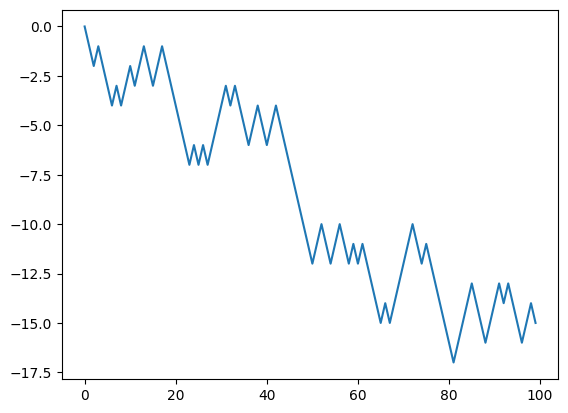

In [10]:
plt.figure()
plt.plot(walk[:100])

In [21]:
import numpy as np
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

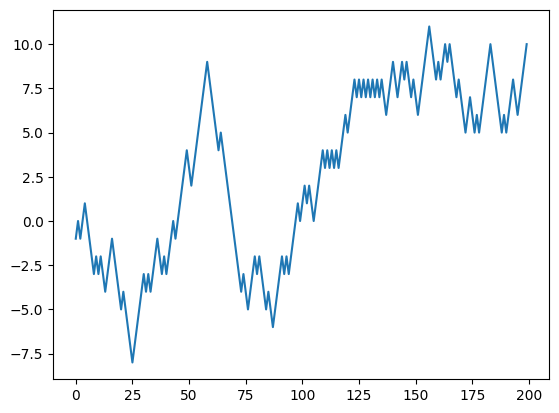

In [23]:
plt.figure()
plt.plot(walk[:200])

In [18]:
walk.min()


-8

In [19]:
walk.max()

50

In [20]:
(np.abs(walk) >= 10).argmax()

155

### Simulating Many Random Walks at Once

If the objective is to simulate a large number of random walks, for example, five thousand of them, slight modifications to the previous code can generate all the random walks efficiently. When passed a 2-tuple, numpy.random functions generate a two-dimensional array of draws. By computing the cumulative sum for each row, all five thousand random walks can be calculated in a single operation:

```python
import numpy as np

nwalks = 5000
nsteps = 1000

draws = rng.integers(0, 2, size=(nwalks, nsteps))  # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
```

This results in a two-dimensional array (`walks`) representing all the random walks, where each row corresponds to a different walk.

Now, various statistics can be computed across all walks, such as the maximum and minimum values:

```python
walks.max()  # Output: 114
walks.min()  # Output: -120
```

To find the minimum crossing time to reach a value of 30 or -30, a Boolean array can be generated to identify walks that reach or exceed 30 in absolute value. The `any` method is employed along axis=1 to check for any True values in each row:

```python
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30.sum()  # Number of walks that hit 30 or -30 (Output: 3395)
```

Using this Boolean array, rows of walks that actually cross the absolute 30 level can be selected. The `argmax` function is then applied along axis=1 to determine the crossing times:

```python
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times  # Array of crossing times
```

Finally, the average minimum crossing time can be computed:

```python
crossing_times.mean()  # Output: 500.5699558173785
```

It's worth noting that while this vectorized approach is efficient, it requires creating an array with nwalks * nsteps elements, potentially consuming a significant amount of memory for large simulations. If memory constraints are a concern, alternative approaches should be considered.

In [108]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

In [109]:
walks.max()
walks.min()

In [110]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30
hits30.sum() # Number that hit 30 or -30

In [111]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

In [112]:
crossing_times.mean()

## Exercises:

1. **Understanding Random Walks:**
   - Modify the code to visualize random walks for different numbers of steps (e.g., 500) and observe how the plot changes.

2. **Statistical Analysis:**
   - Calculate and print the mean and standard deviation of the final positions in the random walks.

3. **Varying Step Distributions:**
   - Experiment with different step distributions. Instead of equal-sized coin flips, use `rng.standard_normal` to generate normally distributed steps with a mean and standard deviation. (e.g, draws = 0.25 * rng.standard_normal((nwalks, nsteps)))
